# What is the True Normal Human Body Temperature? (*solution*)

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

## Preliminary Visual Inspection
Becoming familiar with the data:

In [2]:
print('>>> Shape =', df.shape)
display(df.head(3))    
print('\n>>> Types\n', df.dtypes)

>>> Shape = (130, 3)


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0



>>> Types
 temperature    float64
gender          object
heart_rate     float64
dtype: object


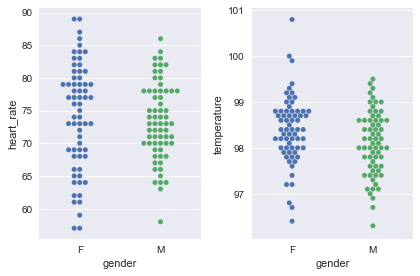

In [3]:
# initialize seaborn style for matplotlib
sns.set() 
    
plt.subplot(1, 2, 1)
sns.swarmplot(x="gender", y="heart_rate", data=df);

plt.subplot(1, 2, 2)
sns.swarmplot(x="gender", y="temperature", data=df);

plt.tight_layout()
plt.show()

### Helper functions

In [4]:
### ecdf(): returns a one-dimensional array of measurements
def ecdf(data):   
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)
    #print(n)

    # y-data for the ECDF: y
    y = np.arange(1, n+1/n) / n
    #print(y)

    return x, y

## 1. Is the distribution of body temperatures normal?

Yes, the theoretical CDF and the ECDF of the data (ploted below) suggest that the body temperatures are **normally distributed**.

In [8]:
### Compute summary statistics
mean    = np.mean(df.temperature) 
std     = np.std(df.temperature) 

>>> mean    = 98.24923076923078
>>> std dev = 0.7303577789050377
>>> samples = 10000


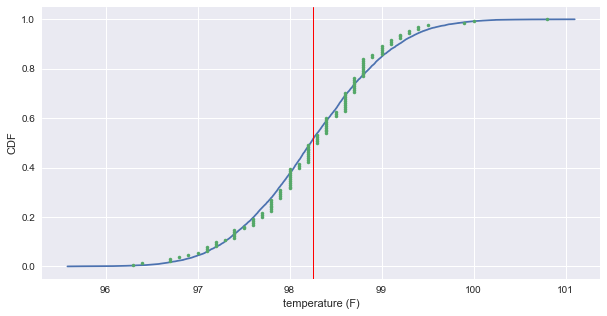

In [9]:
samples = np.random.normal(mean, std, size=10000) 
x, y    = ecdf(df.temperature) 
x_theor, y_theor = ecdf(samples) 

print('>>> mean    =', mean)
print('>>> std dev =', std)
print('>>> samples =', len(samples))

### Plot ECDF
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x_theor, y_theor) 
plt.plot(x, y, marker='.', linestyle='none') 
plt.axvline(mean, color='r', linewidth=1)
plt.xlabel('temperature (F)') 
plt.ylabel('CDF') 
plt.show() 

>>> mean    = 98.24923076923078
>>> std dev = 0.7303577789050377
>>> samples = 10000


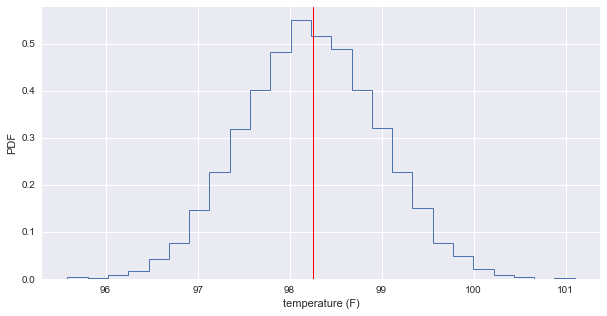

In [11]:
print('>>> mean    =', mean)
print('>>> std dev =', std)
print('>>> samples =', len(samples))

### Plot PDF
fig, ax = plt.subplots(figsize=(10,5))
result = plt.hist(samples, bins=25, normed=True, histtype='step', linewidth=1)
plt.axvline(mean, color='r', linewidth=1)

plt.xlabel('temperature (F)')
plt.ylabel('PDF')
plt.show()